In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold ,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import randint, loguniform
from tpot import TPOTClassifier
from sklearn.preprocessing import label_binarize
from sklearn.exceptions import NotFittedError

c:\Users\User\OneDrive\Desktop\CAD\env\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Recursive Feature Elimination (RFE) 1m 43s

In [2]:
ds=pd.read_csv("modified_dataset.csv")
mean_value=ds['4000000'].mean()
ds['4000000'].fillna(value=mean_value, inplace=True)
ds.isnull().values.any()

x = ds.drop('0.33', axis=1)
y=ds['0.33']

# replace the infinite number with a biggest finite number.
x.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
# convert to 0 and 1 all data of the dataset
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(x)

#Recursive Feature Elimination (RFE)
rfe = RFE(LogisticRegression())
rfe.n_features_to_select = 25
x_scaled = rfe.fit_transform(x, y)

# All selected feature column is stored.
selected_feature_names = x.columns[rfe.support_] 
x = ds[selected_feature_names]

C:\Users\User\AppData\Local\Temp\ipykernel_21100\1062720271.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['4000000'].fillna(value=mean_value, inplace=True)
c:\Users\User\OneDrive\Desktop\CAD\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

**Modify After Here**

In [3]:
print(selected_feature_names)

Index(['3.0', '0.0.3', '3.2', '3.3', '3.0.1', '3.4', '3.5', '0.5', '0.0.5',
       '0.0.6', '0.6', '0.7', '666666.6667.1', '0.0.7', '0.0.10', '12.1',
       '0.28', '33', '-1', '0.0.11', '0.29', '0.30', '0.0.14', '0.31', '0.32'],
      dtype='object')


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

Before tuning 25s

Metrics for Naive Bayes (Before Tuning)
Accuracy : 0.7682
Recall   : 0.7337
Precision: 0.8528
F1 Score : 0.7336
------------------------


c:\Users\User\OneDrive\Desktop\CAD\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression (Before Tuning)
Accuracy : 0.9466
Recall   : 0.9409
Precision: 0.9518
F1 Score : 0.9450
------------------------
Metrics for Decision Tree (Before Tuning)
Accuracy : 0.9998
Recall   : 0.9998
Precision: 0.9997
F1 Score : 0.9998
------------------------


c:\Users\User\OneDrive\Desktop\CAD\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Voting Classifier (Before Tuning)
Accuracy : 0.9572
Recall   : 0.9509
Precision: 0.9645
F1 Score : 0.9559
------------------------


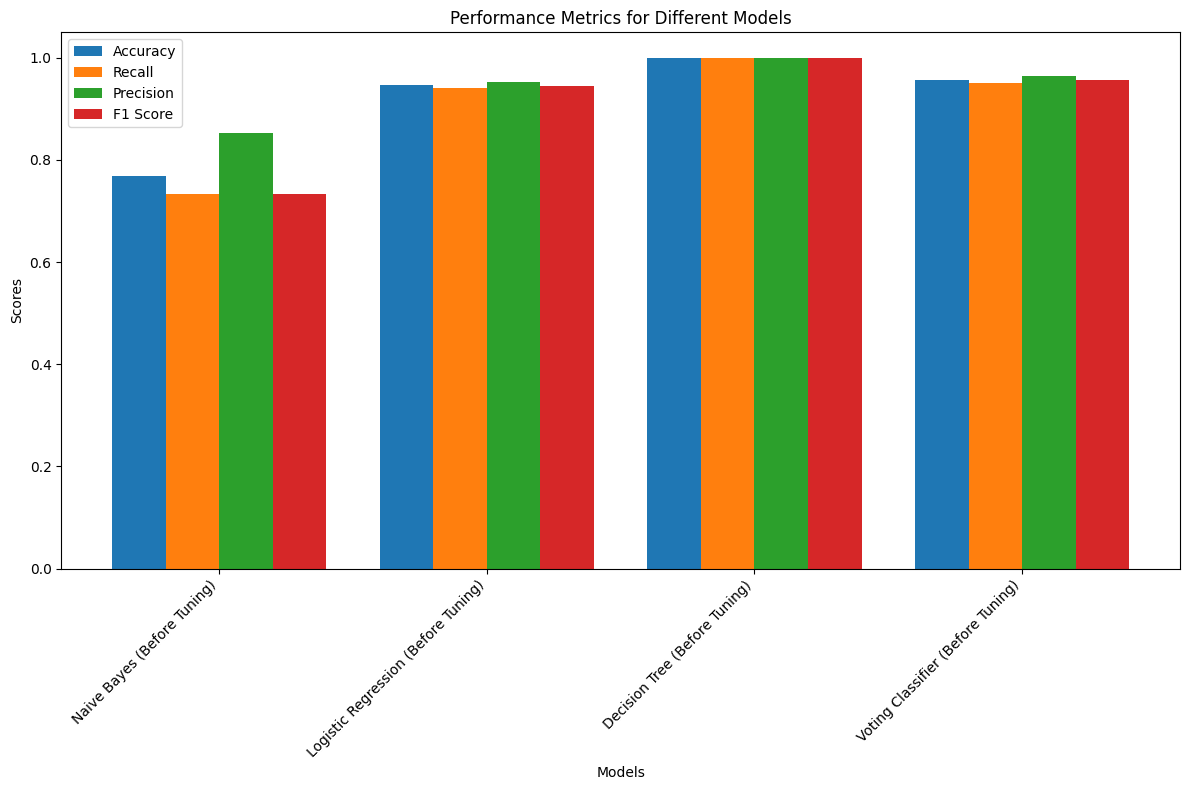

In [5]:
# Function to evaluate and return metrics
def evaluate_model(name, model, x_test, y_test):
    predictions = model.predict(x_test)
    
    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    precision = precision_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    # Print evaluation scores
    print(f"Metrics for {name}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("------------------------")

    return {
        "Model": name,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }

# Pipelines for each classifier
pipeline_nb = Pipeline([('Naive Bayes', GaussianNB())])
pipeline_lr = Pipeline([('Logistic Regression', LogisticRegression(max_iter=1000))])
pipeline_dt = Pipeline([('Decision Tree', DecisionTreeClassifier())])

# Collect metrics before tuning
metrics = []
pipeline_nb.fit(x_train, y_train)
metrics.append(evaluate_model("Naive Bayes (Before Tuning)", pipeline_nb, x_test, y_test))

pipeline_lr.fit(x_train, y_train)
metrics.append(evaluate_model("Logistic Regression (Before Tuning)", pipeline_lr, x_test, y_test))

pipeline_dt.fit(x_train, y_train)
metrics.append(evaluate_model("Decision Tree (Before Tuning)", pipeline_dt, x_test, y_test))

# Voting Classifier without tuning
voting_clf = VotingClassifier(estimators=[('Gaussian', pipeline_nb),
                                          ('Logistic', pipeline_lr),
                                          ('Decision Tree', pipeline_dt)], 
                              voting='hard')

voting_clf.fit(x_train, y_train)
metrics.append(evaluate_model("Voting Classifier (Before Tuning)", voting_clf, x_test, y_test))

# Create DataFrame from metrics
df_metrics = pd.DataFrame(metrics)

# Plotting the metrics
fig, ax = plt.subplots(figsize=(12, 8))

# Set bar width and position
bar_width = 0.2
bar_positions = [i for i in range(len(df_metrics["Model"]))]

# Plot bars for each metric
for i, metric in enumerate(["Accuracy", "Recall", "Precision", "F1 Score"]):
    ax.bar(
        [p + bar_width * i for p in bar_positions], 
        df_metrics[metric],
        width=bar_width,
        label=metric
    )

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks([p + bar_width * 1.5 for p in bar_positions])
ax.set_xticklabels(df_metrics["Model"], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


After Tuning 6m

Metrics for Naive Bayes (After Tuning)
Accuracy : 0.8706
Recall   : 0.8514
Precision: 0.9058
F1 Score : 0.8613
------------------------


c:\Users\User\OneDrive\Desktop\CAD\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression (After Tuning)
Accuracy : 0.9802
Recall   : 0.9803
Precision: 0.9794
F1 Score : 0.9798
------------------------
Best parameters: {'Decision Tree__criterion': 'entropy', 'Decision Tree__max_depth': 30, 'Decision Tree__min_samples_leaf': 3, 'Decision Tree__min_samples_split': 2}
Best cross-validation accuracy: 0.9998
Metrics for Decision Tree (After Tuning)
Accuracy : 0.9998
Recall   : 0.9998
Precision: 0.9998
F1 Score : 0.9998
------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'Decision Tree__clf__max_depth': None, 'Decision Tree__clf__min_samples_split': 14, 'Gaussian__clf__var_smoothing': np.float64(1.9135880487692272e-09), 'Logistic__clf__C': np.float64(16.172900811143155), 'Logistic__clf__max_iter': 1064}
Metrics for Voting Classifier (After Tuning)
Accuracy : 0.9983
Recall   : 0.9981
Precision: 0.9983
F1 Score : 0.9982
------------------------


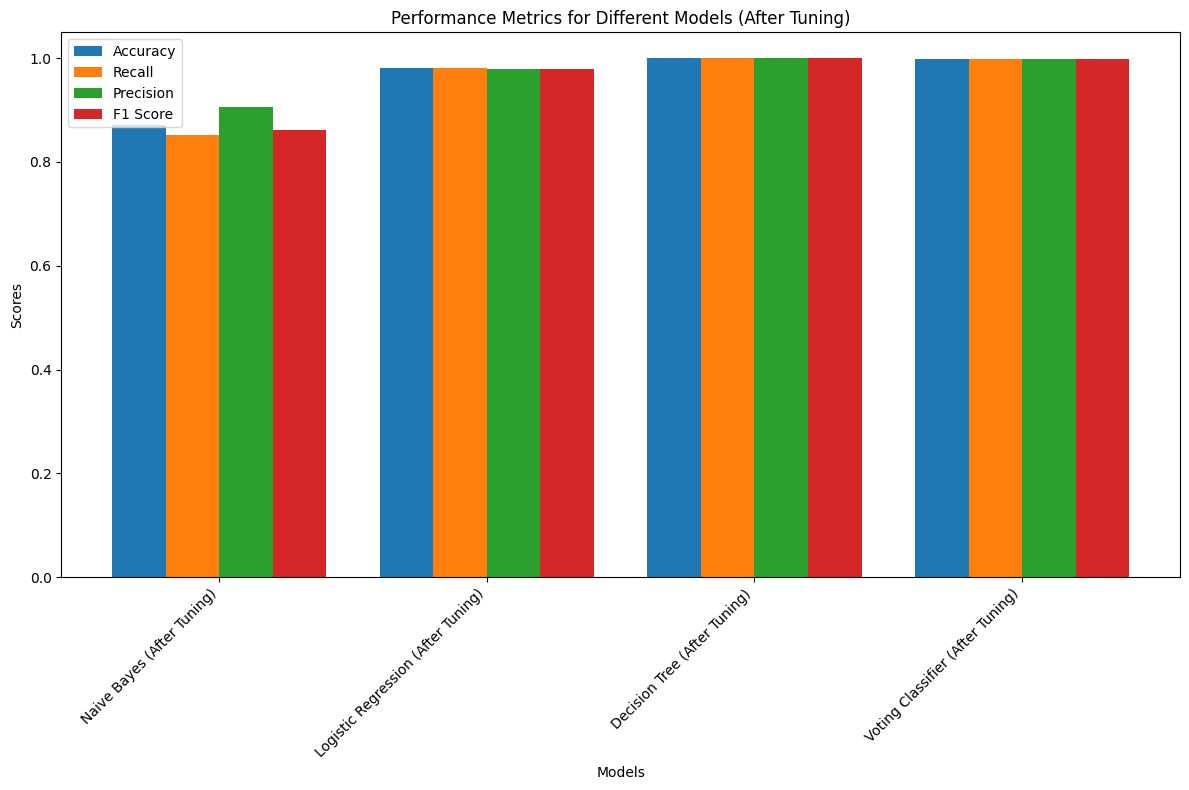

In [6]:
# Function to evaluate and return metrics
def evaluate_model(name, model, x_test, y_test):
    predictions = model.predict(x_test)
    
    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    precision = precision_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    # Print evaluation scores
    print(f"Metrics for {name}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("------------------------")

    return {
        "Model": name,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }

# Create and fit the pipeline for Naive Bayes
pipeline_nb = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=False)),
    ('scaler', StandardScaler()),
    ('Naive Bayes', GaussianNB(var_smoothing=1e-8))
])
pipeline_nb.fit(x_train, y_train)
metrics_nb = evaluate_model("Naive Bayes (After Tuning)", pipeline_nb, x_test, y_test)

# Create and fit the pipeline for Logistic Regression
pipeline_lr = Pipeline([('Logistic Regression', LogisticRegression(max_iter=10000))])
pipeline_lr.fit(x_train, y_train)
metrics_lr = evaluate_model("Logistic Regression (After Tuning)", pipeline_lr, x_test, y_test)

# Define and tune the Decision Tree pipeline with RandomizedSearchCV
pipeline_dt = Pipeline([('Decision Tree', DecisionTreeClassifier())])
param_dist = {
    'Decision Tree__criterion': ['gini', 'entropy'],
    'Decision Tree__max_depth': [None] + list(range(10, 51, 10)),
    'Decision Tree__min_samples_split': randint(2, 11),
    'Decision Tree__min_samples_leaf': randint(1, 5),
}
random_search_dt = RandomizedSearchCV(pipeline_dt, param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_dt.fit(x_train, y_train)

# Print the best parameters and best score for Decision Tree
print(f"Best parameters: {random_search_dt.best_params_}")
print(f"Best cross-validation accuracy: {random_search_dt.best_score_:.4f}")

# Evaluate the best Decision Tree model on the test set
best_model_dt = random_search_dt.best_estimator_
metrics_dt = evaluate_model("Decision Tree (After Tuning)", best_model_dt, x_test, y_test)

# Define the pipelines with a preprocessing step
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'Gaussian__clf__var_smoothing': loguniform(1e-9, 1e-7),
    'Logistic__clf__C': loguniform(0.01, 100),
    'Logistic__clf__max_iter': randint(1000, 10000),
    'Decision Tree__clf__max_depth': [None, 10, 20, 30],
    'Decision Tree__clf__min_samples_split': randint(2, 20)
}

# Initialize the VotingClassifier
voting_clf = VotingClassifier(estimators=[('Gaussian', pipeline_nb),
                                          ('Logistic', pipeline_lr),
                                          ('Decision Tree', pipeline_dt)], 
                              voting='hard')

# Initialize RandomizedSearchCV for the Voting Classifier
random_search_voting = RandomizedSearchCV(estimator=voting_clf, 
                                          param_distributions=param_distributions, 
                                          n_iter=50, 
                                          cv=5, 
                                          n_jobs=-1, 
                                          verbose=1, 
                                          random_state=42)

# Fit the Voting Classifier model
random_search_voting.fit(x_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search_voting.best_params_)

# Evaluate the best Voting Classifier model on the test set
best_voting_clf = random_search_voting.best_estimator_
metrics_voting = evaluate_model("Voting Classifier (After Tuning)", best_voting_clf, x_test, y_test)

# Create DataFrame from metrics
metrics = [metrics_nb, metrics_lr, metrics_dt, metrics_voting]
df_metrics = pd.DataFrame(metrics)

# Plotting the metrics
fig, ax = plt.subplots(figsize=(12, 8))

# Set bar width and position
bar_width = 0.2
bar_positions = [i for i in range(len(df_metrics["Model"]))]

# Plot bars for each metric
for i, metric in enumerate(["Accuracy", "Recall", "Precision", "F1 Score"]):
    ax.bar(
        [p + bar_width * i for p in bar_positions], 
        df_metrics[metric],
        width=bar_width,
        label=metric
    )

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models (After Tuning)')
ax.set_xticks([p + bar_width * 1.5 for p in bar_positions])
ax.set_xticklabels(df_metrics["Model"], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Cross Validation 30s

Classifier: GaussianNB
Fold 1: Accuracy = 0.81
Fold 2: Accuracy = 0.83
Fold 3: Accuracy = 0.81
Fold 4: Accuracy = 0.81
Fold 5: Accuracy = 0.80

Classifier: LogisticRegression
Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.98
Fold 4: Accuracy = 0.98
Fold 5: Accuracy = 0.98

Classifier: DecisionTreeClassifier
Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00

Classifier: VotingClassifier
Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00



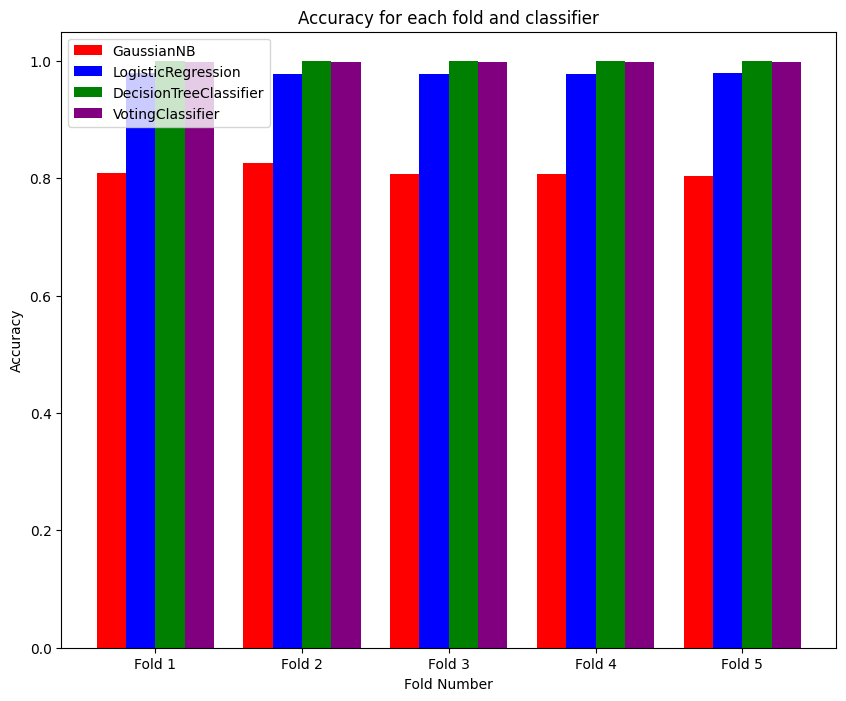

In [7]:
# Perform 5-fold cross-validation and store the results
cv_scores_nb = cross_val_score(pipeline_nb, x_train, y_train, cv=5, scoring='accuracy')
cv_scores_lr = cross_val_score(pipeline_lr, x_train, y_train, cv=5, scoring='accuracy')
cv_scores_dt = cross_val_score(best_model_dt, x_train, y_train, cv=5, scoring='accuracy')
cv_scores_voting = cross_val_score(best_voting_clf, x_train, y_train, cv=5, scoring='accuracy')

# Collect the scores into a dictionary for easier access
scores_dict = {
    'GaussianNB': cv_scores_nb,
    'LogisticRegression': cv_scores_lr,
    'DecisionTreeClassifier': cv_scores_dt,
    'VotingClassifier': cv_scores_voting
}

# Function to print fold accuracy
def print_fold_accuracy(classifier_name, scores):
    print(f'Classifier: {classifier_name}')
    for i, score in enumerate(scores):
        print(f'Fold {i+1}: Accuracy = {score:.2f}')
    print()  # Add a blank line between classifiers

# Print the accuracy for each classifier
for classifier_name, scores in scores_dict.items():
    print_fold_accuracy(classifier_name, scores)
    
    
# Number of folds
n_folds = 5

# Define the positions for each group of bars
ind = np.arange(n_folds)

# Define the width of each bar
width = 0.2

# Create a plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting each classifier's scores
bars_nb = ax.bar(ind - 1.5*width, scores_dict['GaussianNB'], width, color='red', label='GaussianNB')
bars_lr = ax.bar(ind - 0.5*width, scores_dict['LogisticRegression'], width, color='blue', label='LogisticRegression')
bars_dt = ax.bar(ind + 0.5*width, scores_dict['DecisionTreeClassifier'], width, color='green', label='DecisionTreeClassifier')
bars_voting = ax.bar(ind + 1.5*width, scores_dict['VotingClassifier'], width, color='purple', label='VotingClassifier')

# Add labels and title
ax.set_xlabel('Fold Number')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for each fold and classifier')
ax.set_xticks(ind)
ax.set_xticklabels([f'Fold {i+1}' for i in range(n_folds)])
ax.legend()

# Show the plot
plt.show()

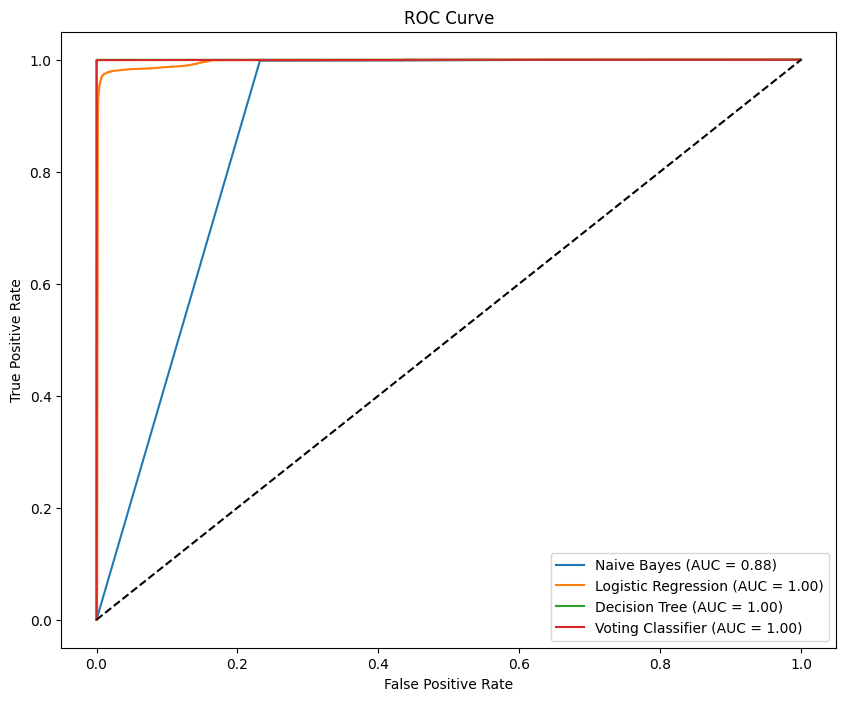

In [24]:
# Function to plot ROC curve for a given model
def plot_roc_curve(model, X_test, y_test, label):
    try:
        # Ensure the model or pipeline is fitted
        if not hasattr(model, 'predict_proba'):
            raise NotFittedError("Model not fitted yet.")
        
        y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class
    except NotFittedError:
        raise ValueError(f"Model '{label}' has not been fitted.")
    except AttributeError:
        y_prob = model.predict(X_test)  # Fallback if model does not have predict_proba
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

# Ensure all models are fitted
pipeline_nb.fit(x_train, y_train)
pipeline_lr.fit(x_train, y_train)
best_model_dt.fit(x_train, y_train)
voting_clf = VotingClassifier(estimators=[('Gaussian', pipeline_nb),
                                          ('Logistic', pipeline_lr),
                                          ('Decision Tree', pipeline_dt)], 
                              voting='soft')

voting_clf.fit(x_train, y_train)

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Naive Bayes (After Tuning)
plot_roc_curve(pipeline_nb, x_test, y_test, 'Naive Bayes')

# Logistic Regression (After Tuning)
plot_roc_curve(pipeline_lr, x_test, y_test, 'Logistic Regression')

# Decision Tree (After Tuning)
plot_roc_curve(best_model_dt, x_test, y_test, 'Decision Tree')

# Voting Classifier (After Tuning)
plot_roc_curve(voting_clf, x_test, y_test, 'Voting Classifier')

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], 'k--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

# Show the plot
plt.show()
